In [ ]:
import numpy as np
from typing import Callable
from matplotlib import pyplot as plt

In [3]:
def lagrange(nodes) -> Callable:
    def _poly(x):
        result = 0

        for i, (_, yi) in enumerate(nodes):
            result += (yi * _l(nodes, x, i))

        return result

    return _poly



def _l(nodes, x, k) -> Callable:
    denominator = 1
    numerator = 1
    xk = nodes[k][0]

    for i, (xi, _) in enumerate(nodes):
        if i == k:
            continue
        numerator *= (x - xi)
        denominator *= (xk - xi)

    return numerator / denominator


In [4]:
def newton(nodes):
    n=len(nodes)

    div_diffs = [[node[1] for node in nodes]]
    for i in range(1, n):
        diffs = []
        for j in range(n - i):
            diff = (div_diffs[i - 1][j + 1] - div_diffs[i - 1][j]) / (nodes[j + i][0] - nodes[j][0])
            diffs.append(diff)
        div_diffs.append(diffs)

    def _poly(x):
        result = nodes[0][1]
        for i in range(1, n):
            term = div_diffs[i][0]
            for j in range(i):
                term *= (x - nodes[j][0])

            result += term

        return result

    return _poly

In [5]:
def plot_nodes(nodes):
    X = [node[0] for node in nodes]
    Y = [node[1] for node in nodes]

    plt.plot(X, Y)


In [6]:
def range_evenly(start, stop, n: int):
    return np.linspace(start=start, stop=stop, num=n, dtype=np.longdouble)

def range_chebyshev(start, stop, n: int):
    return np.array([
        (start + stop) / 2 + (stop - start) / 2 * np.cos(((2*i-1)*np.pi)/(2*n)) for i in range(1, n+1)
    ], dtype=np.longdouble)

In [8]:
START, STOP = -4 * np.pi, 4 * np.pi

In [7]:
def f_real(x):
    return np.exp(np.cos(x))

In [95]:
x_real = range_evenly(START, STOP, 500)
y_real = f_real(x_real)
errors_max = []
error_std = []
diff_max = []
diff_str = []

In [10]:
def err(y):
    return max(abs(y-y_real))

def std_err(ys, k: int):
    s = sum([(y_r - y)**2 for y_r, y in zip(y_real, ys)])
    return 1/k * np.sqrt(s)

In [94]:
def m(n: int, k: int = 500):
    n_x_evenly = range_evenly(START, STOP, n)
    n_x_chebyshev = range_chebyshev(START, STOP, n)
    y_evenly = [f_real(x) for x in n_x_evenly]
    y_chebyshev = [f_real(x) for x in n_x_chebyshev]
    nodes_evenly = list(zip(n_x_evenly, y_evenly))
    nodes_chebyshev = list(zip(n_x_chebyshev, y_chebyshev))
    f_lagrange_evenly = lagrange(nodes_evenly)
    f_lagrange_chebyshev = lagrange(nodes_chebyshev)
    f_newton_evenly = newton(nodes_evenly)
    f_newton_chebyshev = newton(nodes_chebyshev)

    x = range_evenly(START, STOP, k)

    fig, axs = plt.subplots(2, 2, figsize=(9, 9))

    for ax in axs.flat:
        ax.set(xlabel='x', ylabel='y')

    error_std.append([n])
    errors_max.append([n])

    y_lagrange_evenly = f_lagrange_evenly(x)
    axs[0, 0].plot(x_real, y_real)
    axs[0, 0].plot(x, y_lagrange_evenly)
    axs[0, 0].scatter(n_x_evenly, y_evenly)
    axs[0, 0].set_title("Lagrage, równoodległe")
    error_std[-1].append(std_err(y_lagrange_evenly, k))
    errors_max[-1].append(err(y_lagrange_evenly))

    y_lagrange_chebyshev = f_lagrange_chebyshev(x)
    axs[0, 1].plot(x_real, y_real)
    axs[0, 1].plot(x, y_lagrange_chebyshev)
    axs[0, 1].scatter(n_x_chebyshev, y_chebyshev)
    axs[0, 1].set_title("Lagrage, Czebyszew")
    error_std[-1].append(std_err(y_lagrange_chebyshev, k))
    errors_max[-1].append(err(y_lagrange_chebyshev))

    y_newton_evenly = f_newton_evenly(x)
    axs[1, 0].plot(x_real, y_real)
    axs[1, 0].plot(x, y_newton_evenly)
    axs[1, 0].scatter(n_x_evenly, y_evenly)
    axs[1, 0].set_title("Newton, równoodległe")
    error_std[-1].append(std_err(y_newton_evenly, k))
    errors_max[-1].append(err(y_newton_evenly))


    y_newton_chebyshev = f_newton_chebyshev(x)
    axs[1, 1].plot(x_real, y_real)
    axs[1, 1].plot(x, y_newton_chebyshev)
    axs[1, 1].scatter(n_x_chebyshev, y_chebyshev)
    axs[1, 1].set_title("Newton, Czebyszew")

    error_std[-1].append(std_err(y_newton_chebyshev, k))
    errors_max[-1].append(err(y_newton_chebyshev))


    diff_max.append([n, abs(err(y_newton_chebyshev) - err(y_lagrange_chebyshev))])
    diff_str.append([n, abs(std_err(y_newton_chebyshev, k) - std_err(y_lagrange_chebyshev, k))])

    for ax in axs.flat:
        ax.legend(["interpolowana", "interpolująca"], loc="upper left")


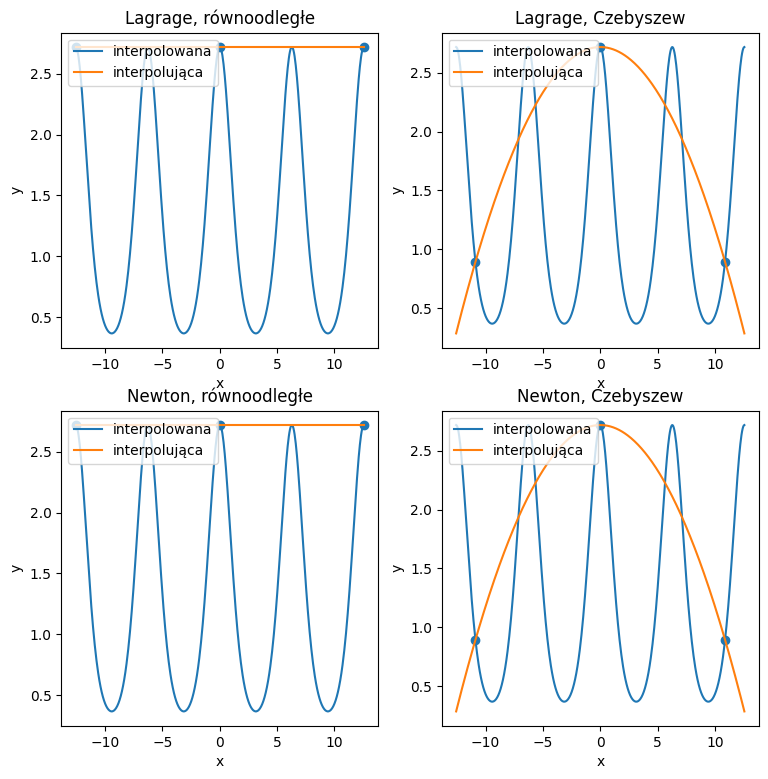

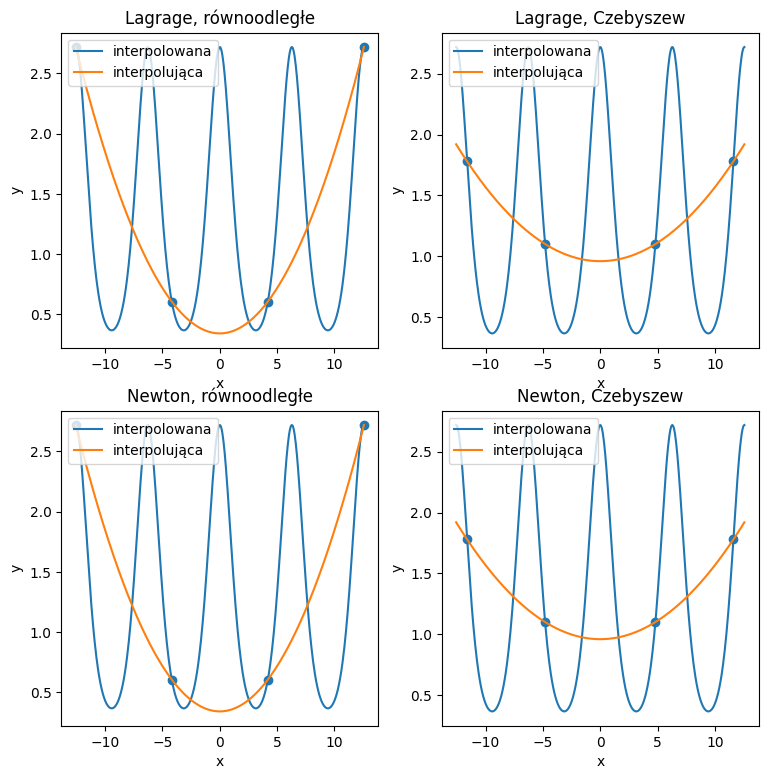

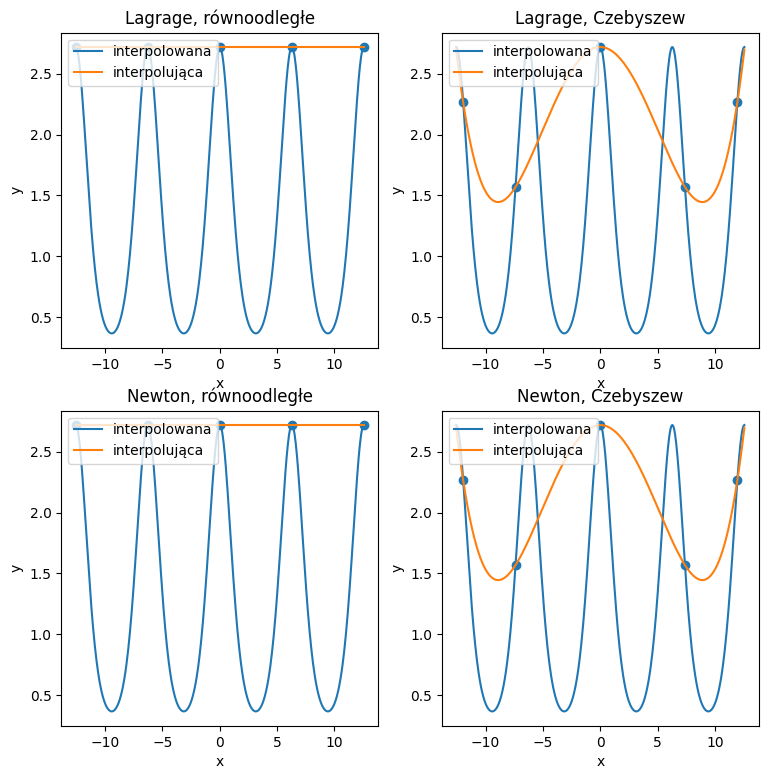

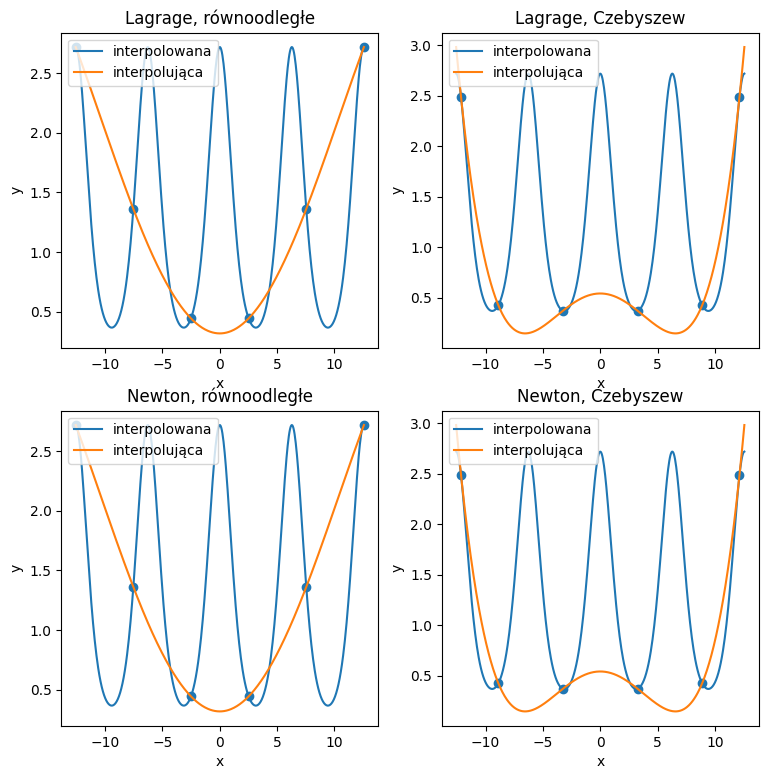

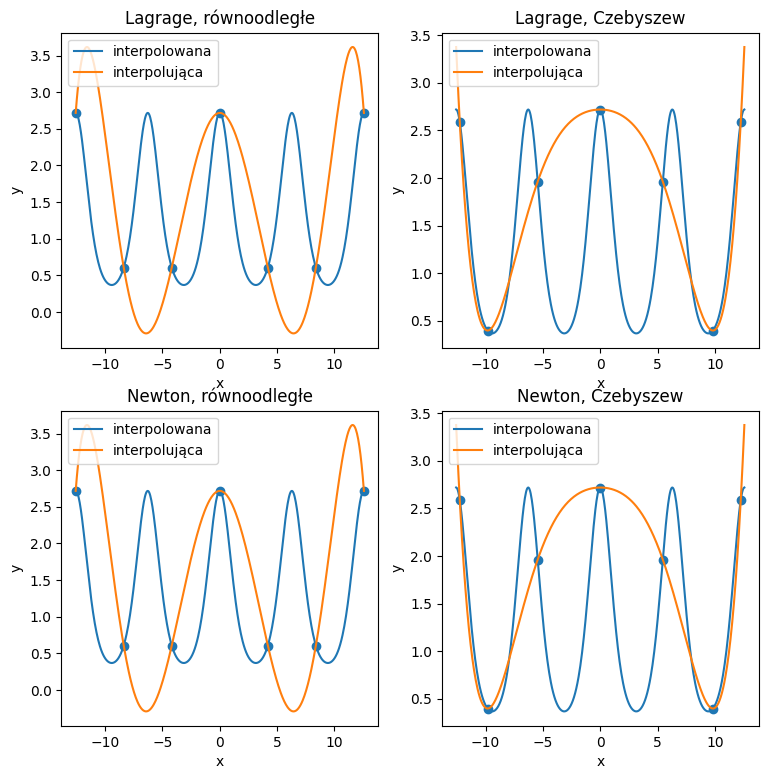

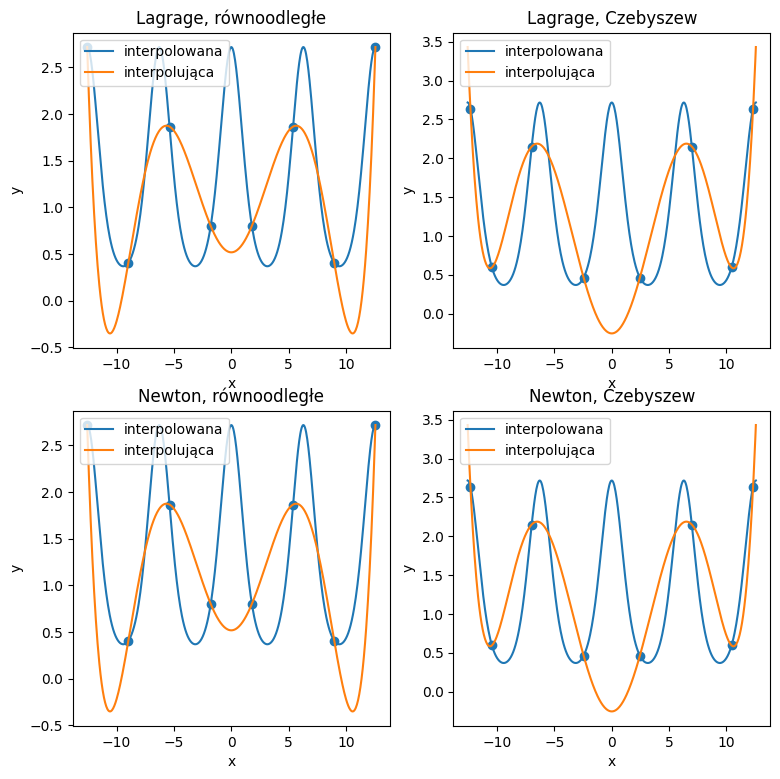

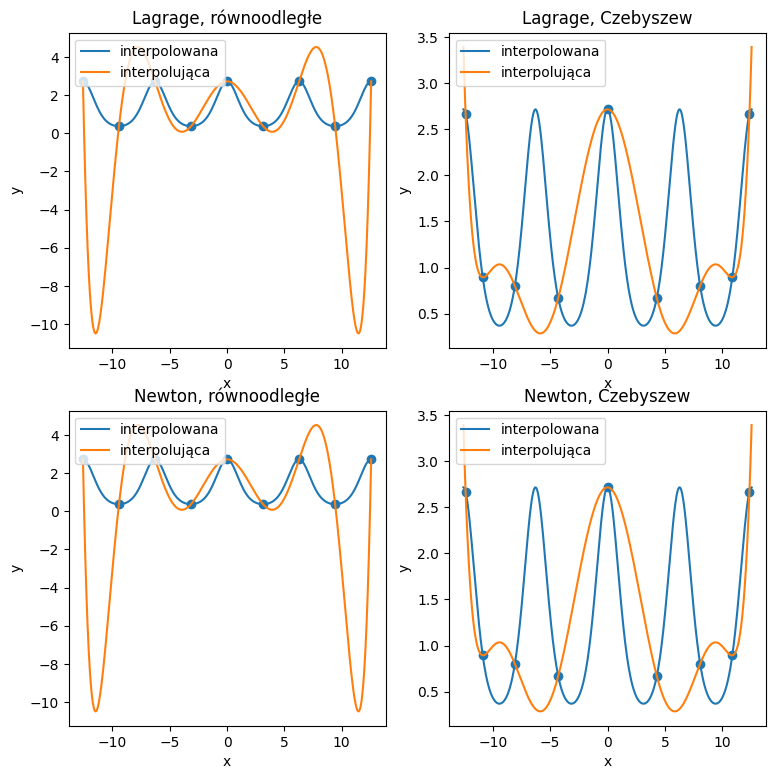

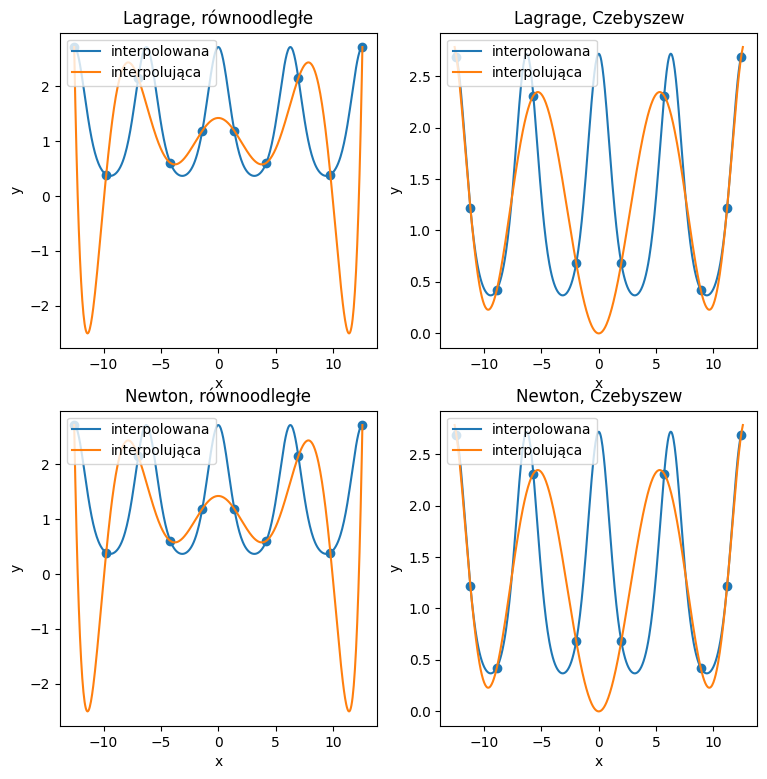

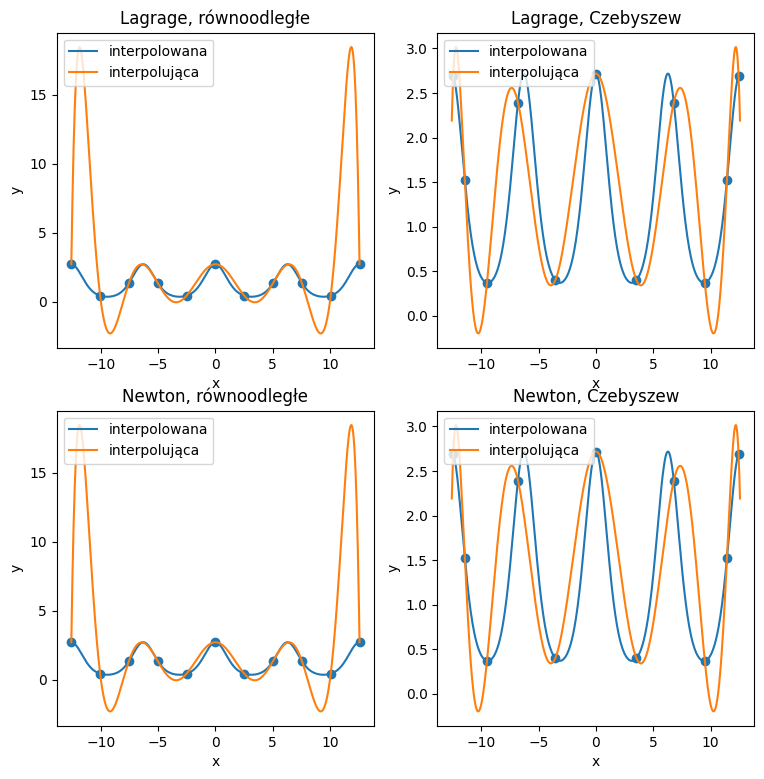

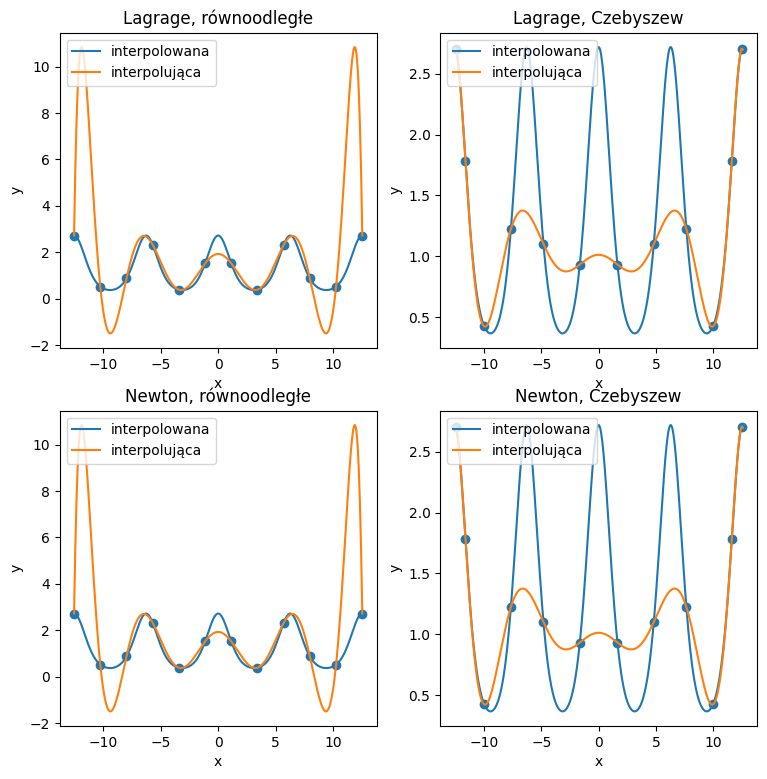

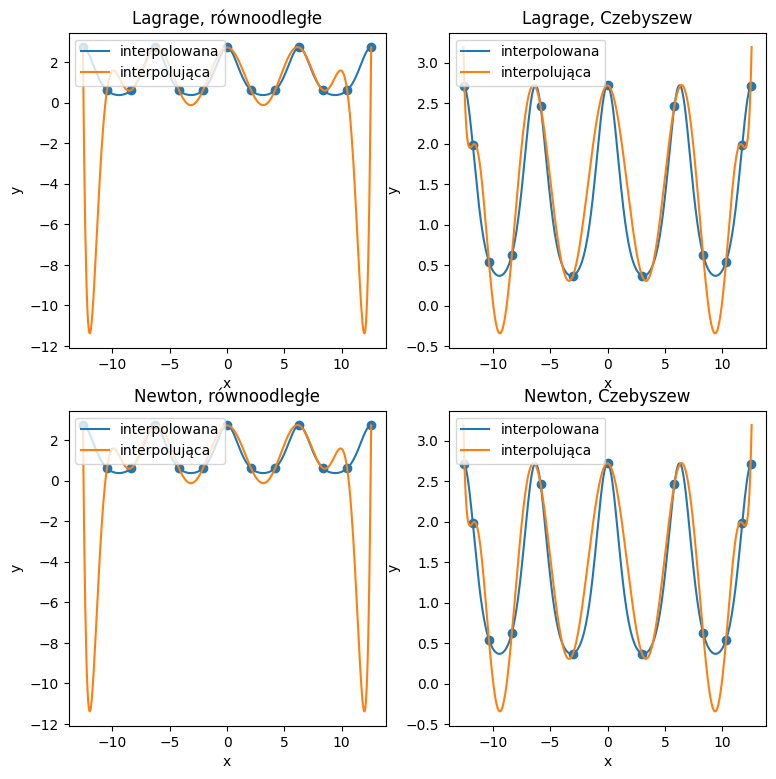

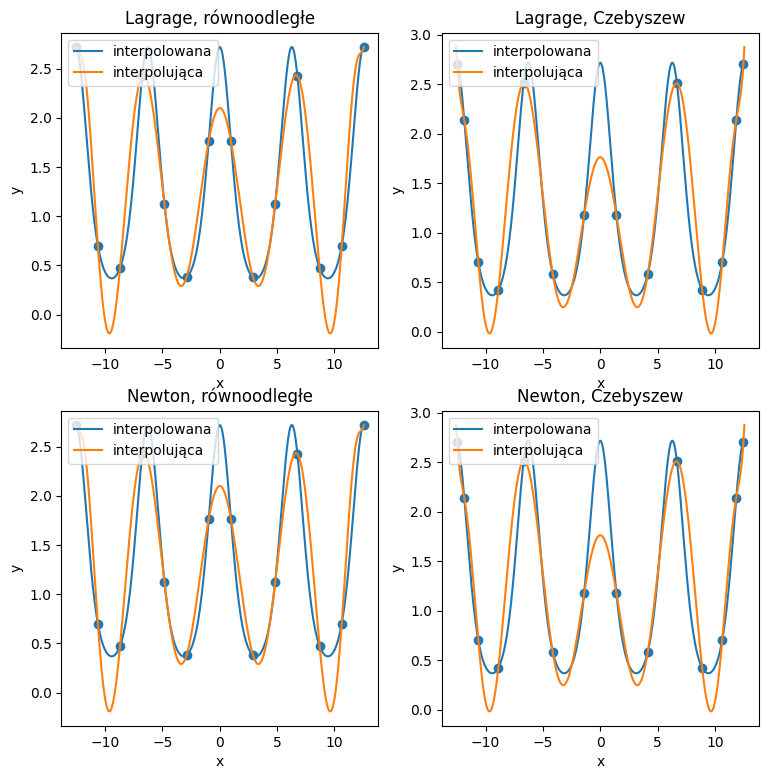

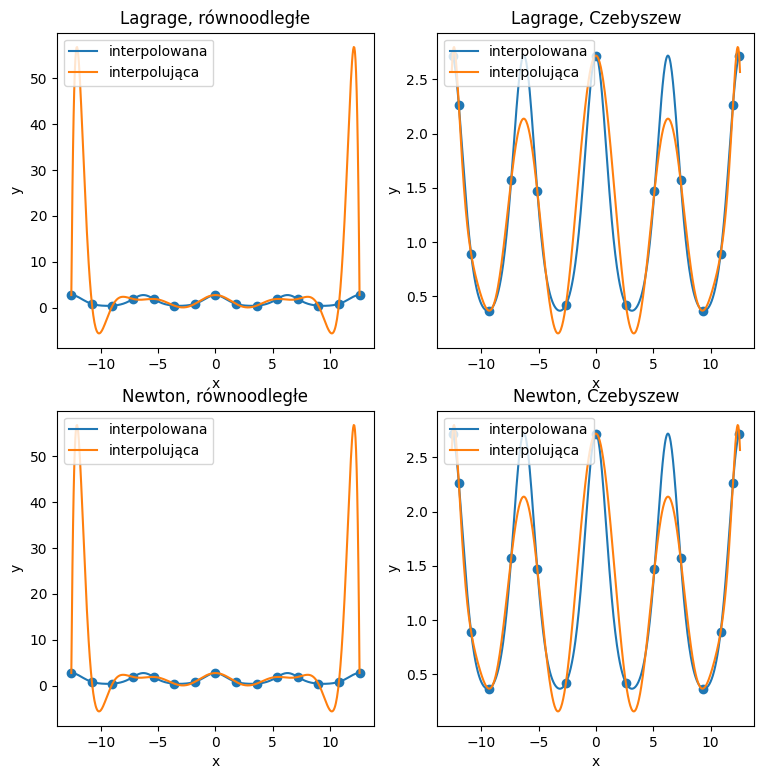

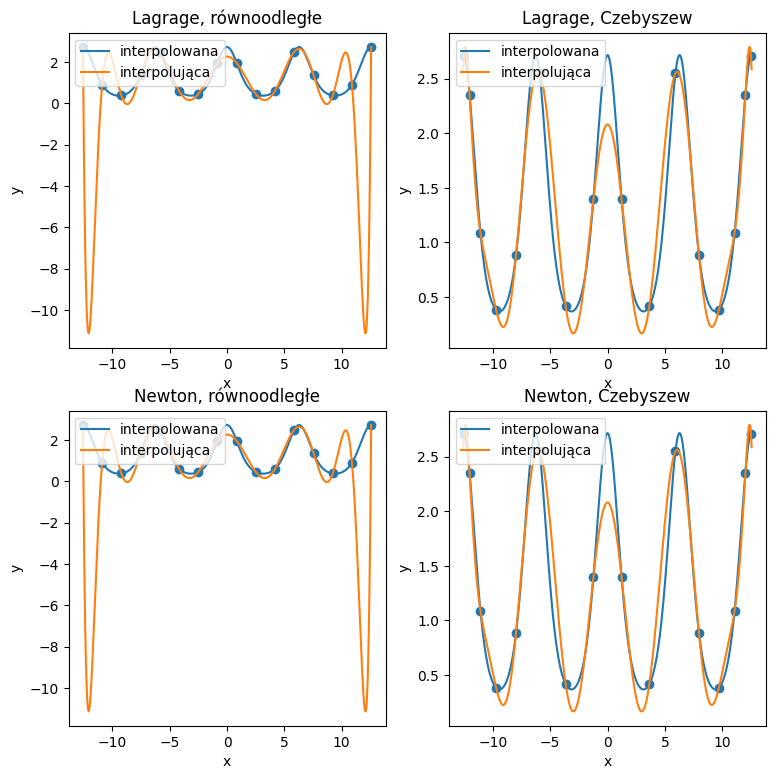

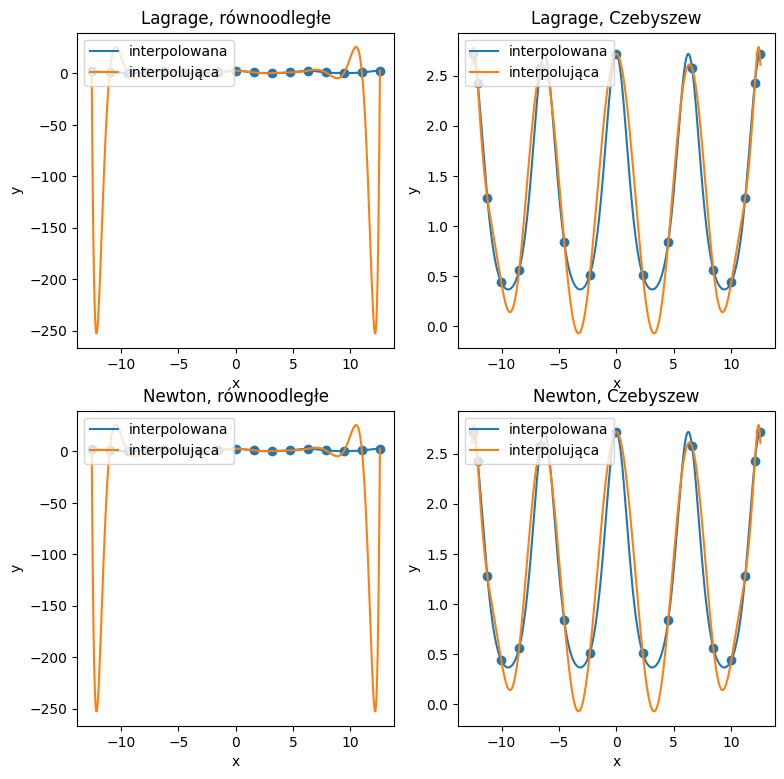

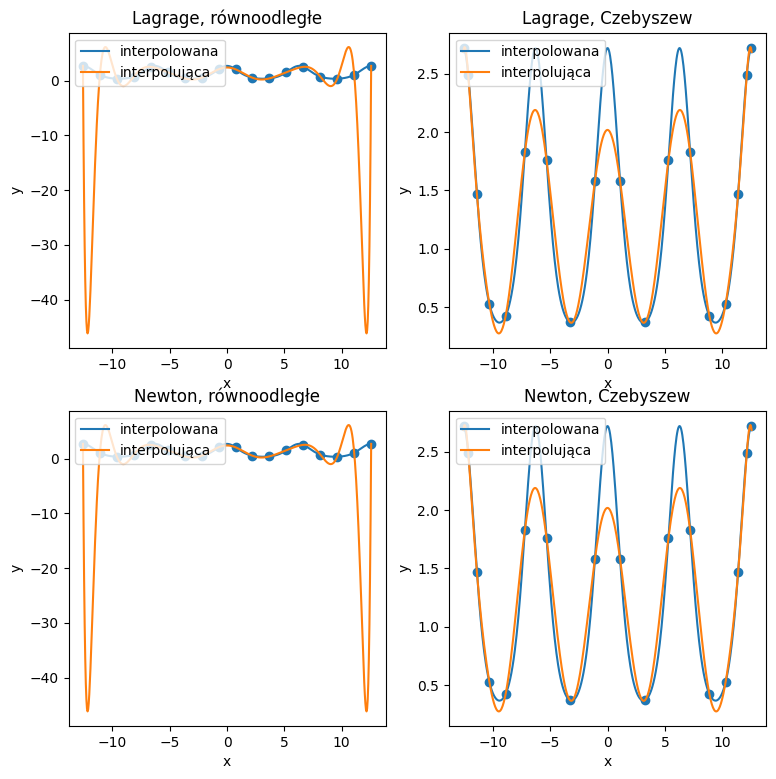

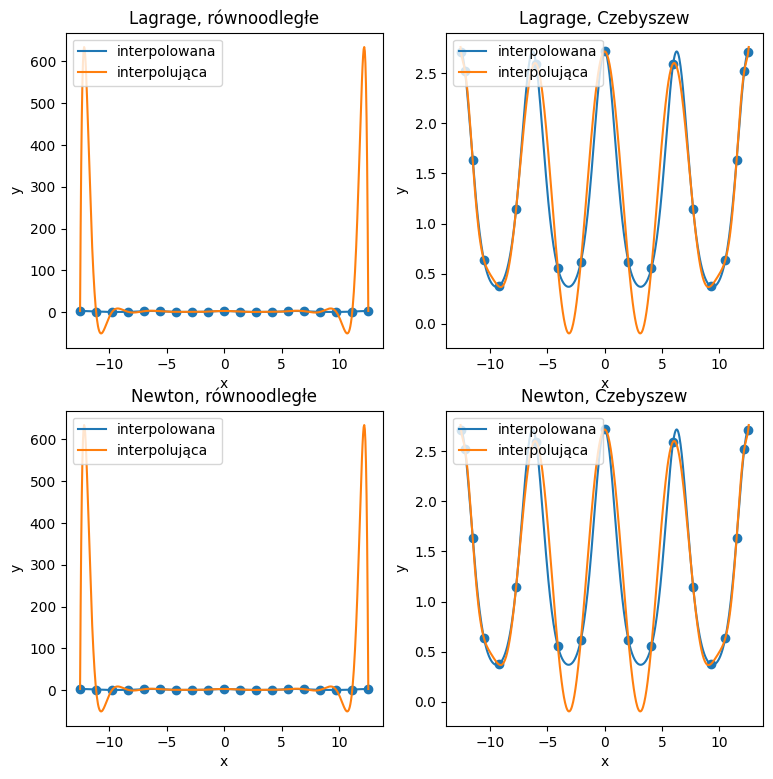

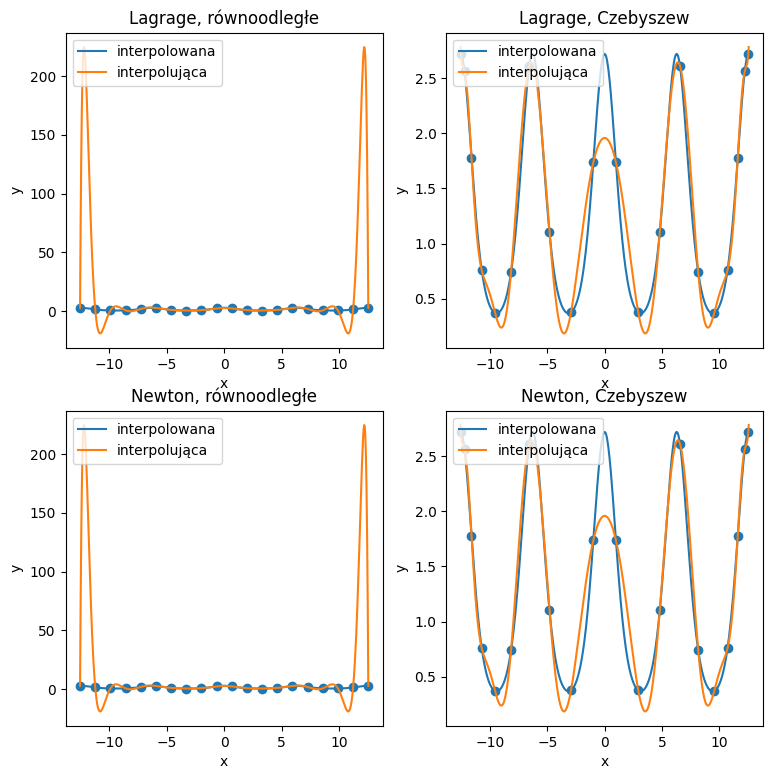

In [96]:
for i in range(3, 21):
    m(i)

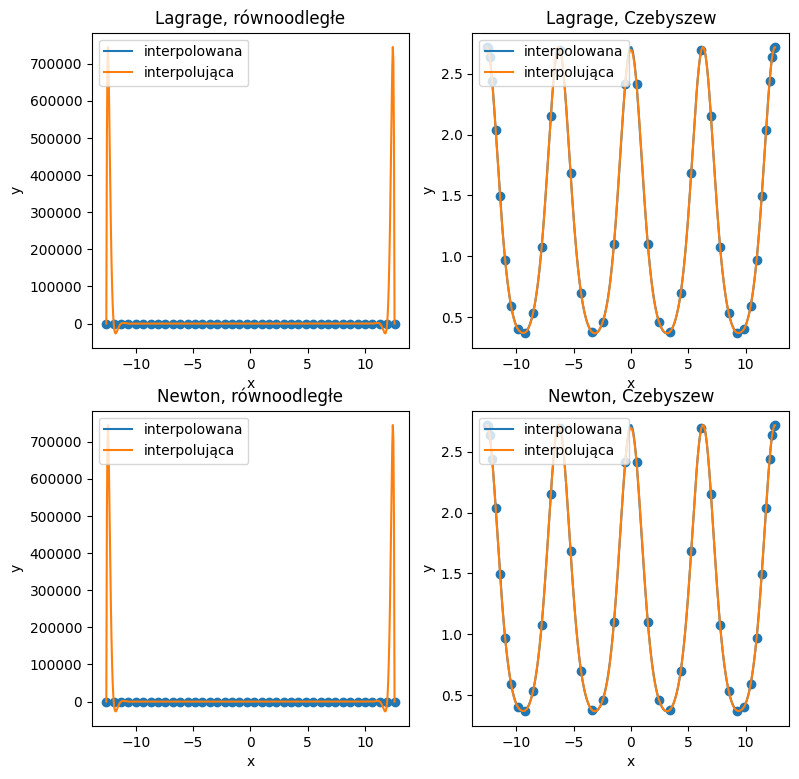

In [97]:
m(40)

In [91]:
print(*error_std, sep="\n")

[3, 0.074565708951099167394, 0.058252187135930282063, 0.074565708951099167394, 0.058252187135930282063]
[4, 0.04734984631928094478, 0.038189889973033499073, 0.04734984631928094478, 0.038189889973033499073]
[5, 0.074565708951099167394, 0.051478220681333604024, 0.074565708951099167394, 0.051478220681333603993]
[6, 0.048752793766025301974, 0.050098358456548230766, 0.048752793766025301974, 0.050098358456548230736]
[7, 0.07047188721024733508, 0.049085312745044260694, 0.070471887210247335, 0.049085312745044260694]
[8, 0.040143630955034648032, 0.042687827124971954124, 0.04014363095503464813, 0.042687827124971954107]
[9, 0.19357785574074358416, 0.047122288449571715607, 0.19357785574074358483, 0.04712228844957171546]
[10, 0.06876333471466161589, 0.040891769678714885308, 0.06876333471466161697, 0.040891769678714885297]
[11, 0.22061849642039010879, 0.030115576123796782664, 0.22061849642039010898, 0.030115576123796782945]
[12, 0.1147304161149743414, 0.027880812992676861186, 0.11473041611497434558,

In [92]:
print(*errors_max, sep="\n")

[3, 2.3503950964563665217, 2.432959328655716445, 2.3503950964563665217, 2.4329593286557164447]
[4, 2.3748487539351847858, 1.7566949283112641522, 2.3748487539351847858, 1.7566949283112641521]
[5, 2.3503950964563665217, 2.0903403506287335208, 2.3503950964563665217, 2.0903403506287335201]
[6, 2.3978991450622238355, 2.5696965507612485487, 2.3978991450622238355, 2.5696965507612485472]
[7, 3.0069300657769525958, 2.1776886907417360242, 3.0069300657769525958, 2.177688690741736024]
[8, 2.1998878787916788355, 2.9729311030143682462, 2.199887878791678839, 2.9729311030143682464]
[9, 12.124515045390344447, 2.4093027747658617849, 12.124515045390344445, 2.409302774765861785]
[10, 4.1819832746281208084, 2.7193998559229300089, 4.181983274628121083, 2.7193998559229300102]
[11, 16.341142577069430292, 1.4417343711260464152, 16.341142577069430424, 1.4417343711260463471]
[12, 8.675717940242631611, 1.7042701001154022593, 8.675717940242631615, 1.7042701001154022725]
[13, 13.679593480832769575, 0.71045017614964

In [98]:
print(*diff_max, sep="\n")

[3, 2.168404344971008868e-19]
[4, 1.084202172485504434e-19]
[5, 6.505213034913026604e-19]
[6, 1.5178830414797062076e-18]
[7, 2.168404344971008868e-19]
[8, 2.168404344971008868e-19]
[9, 2.168404344971008868e-19]
[10, 1.3010426069826053208e-18]
[11, 6.8087896432089678456e-17]
[12, 1.3227266504323154095e-17]
[13, 2.3478398045173598518e-16]
[14, 3.089976191583687637e-17]
[15, 4.401860820291148002e-16]
[16, 6.288372600415925717e-17]
[17, 9.7036094437452646844e-17]
[18, 3.040102891649354433e-16]
[19, 3.4387640304722744133e-15]
[20, 5.319095858213884753e-16]
[40, 5.136104215541781315e-12]


In [99]:
print(*diff_str, sep="\n")

[3, 0.0]
[4, 0.0]
[5, 3.0493186101154812206e-20]
[6, 3.0493186101154812206e-20]
[7, 0.0]
[8, 1.6940658945086006781e-20]
[9, 1.4568966692773965832e-19]
[10, 1.0164395367051604069e-20]
[11, 2.8121493848842771257e-19]
[12, 2.0667603913004928273e-19]
[13, 1.2197274440461924883e-18]
[14, 1.6551023789349028625e-18]
[15, 1.0130514049161432055e-18]
[16, 1.9700292287240517286e-17]
[17, 3.6726501559999208402e-17]
[18, 2.3903269771516355569e-17]
[19, 1.8402637812046929167e-17]
[20, 1.7851388769973830506e-16]
[40, 6.1385470913720884535e-12]
